<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Segmentation_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

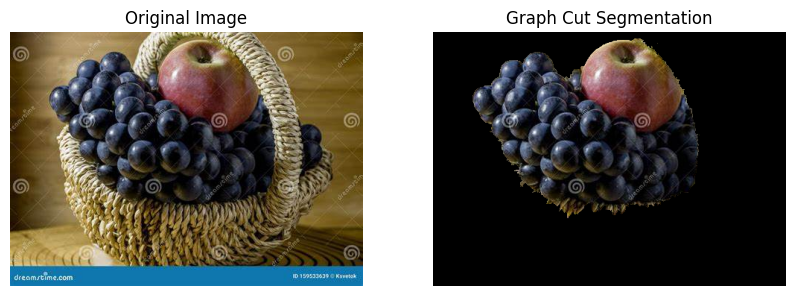

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/OIP (3).jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

height, width = image.shape[:2]
rect = (10, 10, width - 100, height - 100)

cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Graph Cut Segmentation")
plt.axis("off")

plt.show()



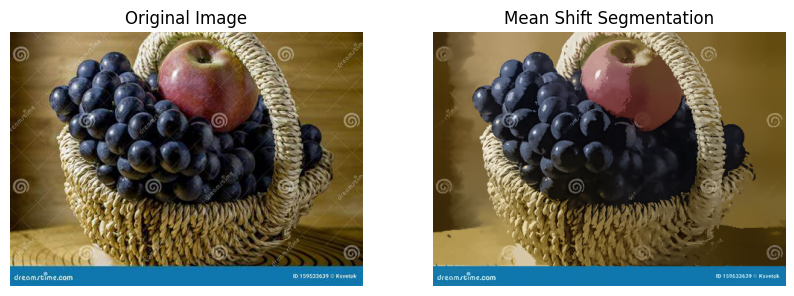

In [ ]:

image = cv2.imread('/content/OIP (3).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

segmented_image = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Mean Shift Segmentation")
plt.axis("off")

plt.show()


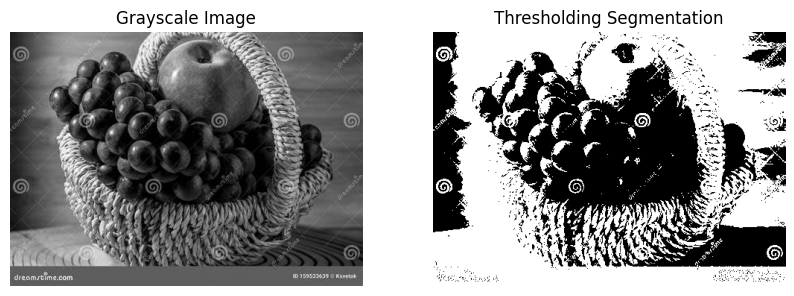

In [ ]:

image_path='/content/OIP (3).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

threshold_value = 80
binary_image = np.zeros_like(image)
binary_image[image > threshold_value] = 255


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Thresholding Segmentation")
plt.axis("off")

plt.show()



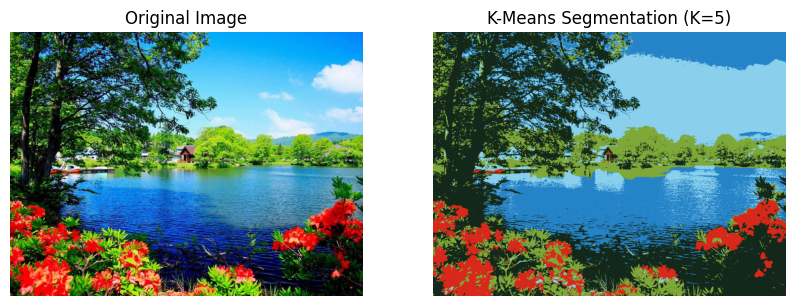

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/scenery-pictures-aq6dk3zjt5xmtrip.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

K = 5
max_iters = 10


np.random.seed(42)
centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]

for _ in range(max_iters):

    distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)

    labels = np.argmin(distances, axis=1)

    new_centroids = np.array([pixels[labels == k].mean(axis=0) for k in range(K)])


    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

segmented_pixels = centroids[labels].astype(np.uint8)
segmented_image = segmented_pixels.reshape(image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"K-Means Segmentation (K={K})")
plt.axis("off")

plt.show()
